**Import modules**

In [ ]:
!pip install plotly
!pip install openpyxl
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Read the Data**

In [ ]:
#load the dataset
data=pd.read_csv('/content/Online_Retail_C.csv')

**Basic exploration and data preprocessing**

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,01-12-2010 10:03,8.50,12431.0,Australia
1,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,01-12-2010 10:03,4.95,12431.0,Australia
2,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12,01-12-2010 10:03,1.25,12431.0,Australia
3,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,01-12-2010 10:03,5.45,12431.0,Australia
4,536389,35004G,SET OF 3 GOLD FLYING DUCKS,4,01-12-2010 10:03,6.35,12431.0,Australia


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46426,C581229,23158,SET OF 5 LUCKY CAT MAGNETS,-36,08-12-2011 10:14,2.08,12558.0,USA
46427,C581229,22712,CARD DOLLY GIRL,-12,08-12-2011 10:14,0.42,12558.0,USA
46428,C581229,22027,TEA PARTY BIRTHDAY CARD,-12,08-12-2011 10:14,0.42,12558.0,USA
46429,C581229,21508,VINTAGE KID DOLLY CARD,-12,08-12-2011 10:14,0.42,12558.0,USA
46430,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,08-12-2011 10:14,0.42,12558.0,USA


In [ ]:
data.shape

(46431, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46431 entries, 0 to 46430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46431 non-null  object 
 1   StockCode    46431 non-null  object 
 2   Description  46431 non-null  object 
 3   Quantity     46431 non-null  int64  
 4   InvoiceDate  46431 non-null  object 
 5   UnitPrice    46431 non-null  float64
 6   CustomerID   44951 non-null  float64
 7   Country      46431 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
#Number of rows and columns in data set
print("Number of rows in dataset is: ", data.shape[0])
print("Number of columns in dataset is: ", data.shape[1])

Number of rows in dataset is:  46431
Number of columns in dataset is:  8


In [ ]:
print("Number of unique customers IDs:", len(data['CustomerID'].unique().tolist()))

Number of unique customers IDs: 423


we could see that there are negative values in these variables, which are not possible values for price and quantity.

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,46431.000000,46431.000000,44951.000000
mean,19.655424,5.450852,13193.105203
std,47.233708,63.360527,1085.609495
min,-624.000000,0.000000,12347.000000
25%,4.000000,1.250000,12484.000000
50%,10.000000,1.950000,12658.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17844.000000


In the description of dataset it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.

**Filtering transaction with invoice number started with letter 'C':**

In [ ]:
cancelled = data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1185,C538723,22333,RETROSPOT PARTY BAG + STICKER SET,-7,14-12-2010 11:12,1.65,12434.0,Australia
1186,C538723,22094,RED RETROSPOT TISSUE BOX,-5,14-12-2010 11:12,1.25,12434.0,Australia
1187,C538723,21217,RED RETROSPOT ROUND CAKE TINS,-1,14-12-2010 11:12,9.95,12434.0,Australia
1188,C543375,22325,MOBILE VINTAGE HEARTS,-3,07-02-2011 15:09,4.95,16321.0,Australia
1189,C543375,22087,PAPER BUNTING WHITE LACE,-18,07-02-2011 15:09,2.95,16321.0,Australia


Among cancelled transactions ther are not any transaction with positive quantity

In [ ]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Hovewer some transactions with negative quantity doesn't belong to cancelled:

In [ ]:
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", data[data['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 1432
Total number of transaction with negative quantity: 1432


There are also transactions with zero price. Transactions with zero price doesn't bring usefull information to analysis, moreover mainly there are not any description for such transactions. This transactions could be deleted.

In [ ]:
data[data['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
473,554037,22619,SET OF 6 SOLDIER SKITTLES,80,20-05-2011 14:13,0.0,12415.0,Australia
1147,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,03-11-2011 11:26,0.0,12415.0,Australia
1149,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,04-11-2011 11:55,0.0,12431.0,Australia
6088,539722,22423,REGENCY CAKESTAND 3 TIER,10,21-12-2010 13:45,0.0,14911.0,EIRE
9015,560283,22624,IVORY KITCHEN SCALES,12,18-07-2011 08:32,0.0,NaN,EIRE


Also there are 2 transactions with negative price. From the description we could see that these transactions were probably made as some correction, so they also should be deleted.

In [ ]:
data[data['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Percentage of transactions which will be deleted:

In [ ]:
print("Percentage of cancelled transactions:" , round(len(cancelled)/len(data)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(data[data['UnitPrice']<=0])/len(data)*100, 2),"%")

Percentage of cancelled transactions: 3.08 %
Precentage of transactions with zero or negative price 0.04 %


In [ ]:
data = data[(data['UnitPrice'] > 0) & (data['Quantity']>0)]

All rows with missing descriptions are gone after deleting problematic transactiones.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46431 entries, 0 to 46430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46431 non-null  object 
 1   StockCode    46431 non-null  object 
 2   Description  46431 non-null  object 
 3   Quantity     46431 non-null  int64  
 4   InvoiceDate  46431 non-null  object 
 5   UnitPrice    46431 non-null  float64
 6   CustomerID   44951 non-null  float64
 7   Country      46431 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


Check and delete duplicate transactions:

In [ ]:
print("Number of duplicated transactions:", len(data[data.duplicated()]))

Number of duplicated transactions: 90


In [ ]:
data.drop_duplicates(inplace = True)

Drop rows with missing customers IDs

In [ ]:
 data = data.dropna(subset=['CustomerID'])

It should be taken into accoun that the same description could be written in different cases, let's convert all description into lowercase.

In [ ]:
data['Description'] = data['Description'].str.lower()

In [ ]:
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 2903


Removing punctuations for the description:

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536389,22941,christmas lights 10 reindeer,6,01-12-2010 10:03,8.50,12431.0,Australia
1,536389,21622,vintage union jack cushion cover,8,01-12-2010 10:03,4.95,12431.0,Australia
2,536389,21791,vintage heads and tails card game,12,01-12-2010 10:03,1.25,12431.0,Australia
3,536389,35004C,set of 3 coloured flying ducks,6,01-12-2010 10:03,5.45,12431.0,Australia
4,536389,35004G,set of 3 gold flying ducks,4,01-12-2010 10:03,6.35,12431.0,Australia


In [ ]:
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

After this there are less unqiue descriptions:

In [ ]:
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 2897


Stock Code should be numerical value, hovewer there are some transactions which contains only multiple letters/words, this transactions will also be dropped

In [ ]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [ ]:
len(data['StockCode'].unique().tolist())

2792

In [ ]:
# Descending order of how many units of each product were purchased in total
data.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
rabbit night light,15429
mini paint set vintage,12409
pack of 72 retrospot cake cases,11204
spaceboy lunch box,8361
dolly girl lunch box,7149


In [ ]:
# Calculate the total cost per invoice.
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [ ]:
# Descending order of how much was each invoice?
data.groupby("InvoiceNo").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
InvoiceNo,
556917,22775.93
563614,21880.44
572035,20277.92
563076,19150.66
541220,16774.72


In [ ]:
pd.DataFrame(data['StockCode'])

,StockCode
0,22941
1,21622
2,21791
3,35004C
4,35004G
...,...
46426,23158
46427,22712
46428,22027
46429,21508


In [ ]:
pd.DataFrame(data['UnitPrice'].describe())

,UnitPrice
count,43579.000000
mean,2.986676
std,3.803134
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,165.000000


In [ ]:
data[data['UnitPrice']>50]['Description'].unique().tolist()

['vintage blue kitchen cabinet',
 'vintage red kitchen cabinet',
 'rustic  seventeen drawer sideboard',
 'love seat antique white metal',
 'school desk and chair ',
 'chest natural wood 20 drawers']

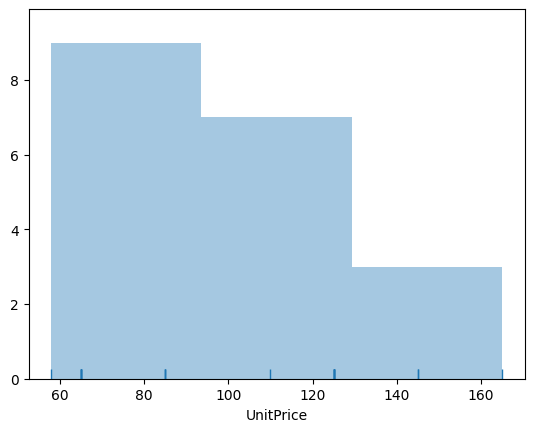

In [ ]:
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

In [ ]:
countrybase_retail = cancelled.groupby(['Country']).agg(
                     InvoiceCount = ('InvoiceNo', 'count'),
                     QuantityCount = ('Quantity', 'count'),
                     TotalPrice = ('UnitPrice', 'sum'),
                     Customers = ('CustomerID', 'count')).reset_index()

In [ ]:
countrybase_retail.sort_values('TotalPrice', ascending=False,
                               inplace=True, ignore_index=True)

In [ ]:
countrybase_retail

,Country,InvoiceCount,QuantityCount,TotalPrice,Customers
0,Singapore,7,7,12158.90,7
1,EIRE,302,302,9957.24,247
2,France,149,149,6039.20,149
3,Hong Kong,4,4,5574.76,0
4,Portugal,18,18,4266.82,18
5,Germany,453,453,4133.86,453
6,Spain,48,48,3129.11,48
7,Norway,14,14,866.59,14
8,Australia,74,74,442.25,74
9,Cyprus,8,8,413.89,8


In [ ]:
print("Transactions were made in", len(data['Country'].unique().tolist()), "different countries")

Transactions were made in 36 different countries


In [ ]:
print("Number of transactions where country is unspecified:", len(data[data['Country']=='Unspecified']))

Number of transactions where country is unspecified: 241


In [ ]:
# Get the top 10 most preferred products
most_preferred_products = data['Description'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

In [ ]:
# Get the top 10 countries with the highest customer base
countries = data['Country'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

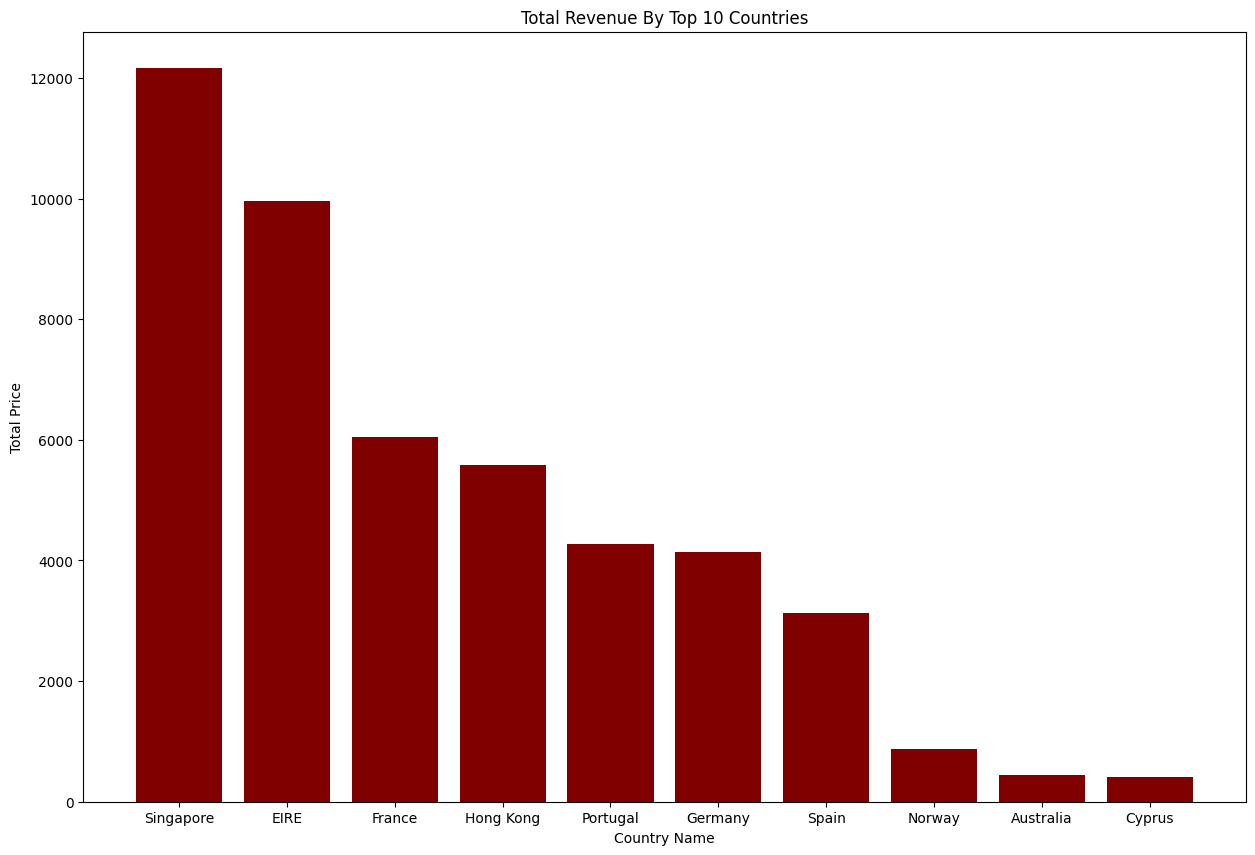

In [ ]:
#Show Total Revenue By Top 10 Countries


fig = plt.figure(figsize = (15, 10))

plt.bar(countrybase_retail['Country'].head(10), countrybase_retail['TotalPrice'].head(10),
        color ='maroon')

plt.xlabel("Country Name")
plt.ylabel("Total Price")
plt.title("Total Revenue By Top 10 Countries")
plt.show()

In [ ]:
# Descending order of how many units of each product were purchased in total
data.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
rabbit night light,15429
mini paint set vintage,12409
pack of 72 retrospot cake cases,11204
spaceboy lunch box,8361
dolly girl lunch box,7149


In [ ]:
cancelled['Description'].value_counts()

Description
Manual                                48
POSTAGE                               38
REGENCY CAKESTAND 3 TIER              33
JAM MAKING SET WITH JARS              17
SET OF 3 REGENCY CAKE TINS            14
                                      ..
SET/3 OCEAN SCENT CANDLE JEWEL BOX     1
GIN + TONIC DIET METAL SIGN            1
METAL SIGN NEIGHBOURHOOD WITCH         1
COOK WITH WINE METAL SIGN              1
ELEPHANT BIRTHDAY CARD                 1
Name: count, Length: 716, dtype: int64

In [ ]:
cancelled['StockCode'].value_counts()

StockCode
M         48
POST      38
22423     33
22960     17
21232     14
          ..
90169      1
90170      1
90174      1
90177A     1
21507      1
Name: count, Length: 706, dtype: int64

Separate the Transactions Individual

In [ ]:
# Transactions done in France
basket_France = (data[data[ 'Country'] == "France"]
.groupby(['InvoiceNo', 'Description' ]) ['Quantity']
.sum( ) .unstack() .reset_index().fillna(0)
.set_index('InvoiceNo'))

# Transactions done in Germany
basket_Germany = (data[data['Country'] == "Germany"]
.groupby(['InvoiceNo', 'Description' ]) ['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

# Transactions done in Sweden
basket_Sweden = (data[data['Country'] == "Sweden"]
.groupby(['InvoiceNo', 'Description']) ['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

In [ ]:
basket_France.head()

Description,50s christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,set 2 tea towels i love london,spaceboy baby gift set,trellis coat rack,10 colour spaceboy pen,12 coloured party balloons,12 egg house painted wood,...,wrap suki and friends,wrap vintage petals design,yellow coat rack paris fashion,yellow giant garden thermometer,zinc star tlight holder,zinc folkart sleigh bells,zinc herb garden container,zinc metal heart decoration,zinc tlight holder star large,zinc tlight holder stars small
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_Germany.head()

Description,50s christmas gift bag large,dolly girl beaker,i love london mini backpack,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,10 colour spaceboy pen,12 coloured party balloons,12 ivory rose peg place settings,12 message cards with envelopes,...,yuletide images gift wrap set,zinc heart tlight holder,zinc star tlight holder,zinc box sign home,zinc folkart sleigh bells,zinc heart lattice tlight holder,zinc metal heart decoration,zinc tlight holder star large,zinc tlight holder stars small,zinc willie winkie candle stick
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_Sweden.head()

Description,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,12 pencils tall tube woodland,3 piece spaceboy cookie cutter set,3 raffia ribbons 50s christmas,3 raffia ribbons vintage christmas,3 tier cake tin red and cream,3 traditional biscuit cutters set,36 doilies dolly girl,...,wooden star christmas scandinavian,wooden tree christmas scandinavian,woodland charlotte bag,woodland small red felt heart,world war 2 gliders asstd designs,wrap vintage doily,wrap alphabet design,wrap dolly girl,wrap red vintage doily,zinc willie winkie candle stick
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
538848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,...,0.0,0.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,0.0
540040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542911,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0


Defining the hot encoding function to make the data suitable

In [ ]:
# for the concerned libraries
#By converting quantities to presence (1) or absence (0), the focus might shift to identifying frequent itemsets
#(groups of items bought together) regardless of the exact quantity purchased.
def hot_encode(x):
    if(x <= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
basket_encoded = basket_France. applymap(hot_encode)
basket_France = basket_encoded

basket_encoded = basket_Germany.applymap(hot_encode)
basket_Germany = basket_encoded

basket_encoded = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded

In [ ]:
basket_France.head()

Description,50s christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,set 2 tea towels i love london,spaceboy baby gift set,trellis coat rack,10 colour spaceboy pen,12 coloured party balloons,12 egg house painted wood,...,wrap suki and friends,wrap vintage petals design,yellow coat rack paris fashion,yellow giant garden thermometer,zinc star tlight holder,zinc folkart sleigh bells,zinc herb garden container,zinc metal heart decoration,zinc tlight holder star large,zinc tlight holder stars small
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Building the Apriori Algorithm**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#Apriori

#Generatig frequent itemsets for France Basket
my_frequent_itemsets_F = apriori(basket_France, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
#generating rules
my_rules_F = association_rules(my_frequent_itemsets_F, metric="lift", min_threshold=1)
my_rules_F

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(alarm clock bakelike red ),(alarm clock bakelike green),0.084475,0.086758,0.070776,0.837838,9.657183,0.063447,5.631659,0.979165
1,(alarm clock bakelike green),(alarm clock bakelike red ),0.086758,0.084475,0.070776,0.815789,9.657183,0.063447,4.969993,0.981613
2,(plasters in tin spaceboy),(plasters in tin circus parade ),0.121005,0.150685,0.079909,0.660377,4.382504,0.061675,2.500761,0.878071
3,(plasters in tin circus parade ),(plasters in tin spaceboy),0.150685,0.121005,0.079909,0.530303,4.382504,0.061675,1.871410,0.908756
4,(plasters in tin woodland animals),(plasters in tin circus parade ),0.152968,0.150685,0.091324,0.597015,3.962008,0.068274,2.107560,0.882615
5,(plasters in tin circus parade ),(plasters in tin woodland animals),0.150685,0.152968,0.091324,0.606061,3.962008,0.068274,2.150158,0.880242
6,(plasters in tin woodland animals),(plasters in tin spaceboy),0.152968,0.121005,0.093607,0.611940,5.057167,0.075097,2.265104,0.947144
7,(plasters in tin spaceboy),(plasters in tin woodland animals),0.121005,0.152968,0.093607,0.773585,5.057167,0.075097,3.741058,0.912702
8,(set6 red spotty paper cups),(set20 red retrospot paper napkins ),0.123288,0.118721,0.091324,0.740741,6.239316,0.076687,3.399217,0.957812
9,(set20 red retrospot paper napkins ),(set6 red spotty paper cups),0.118721,0.123288,0.091324,0.769231,6.239316,0.076687,3.799087,0.952850


In [ ]:
print(len(my_rules_F))

20


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Generatig frequent itemsets for Germany Basket
my_frequent_itemsets_G = apriori(basket_Germany, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
#generating rules
my_rules_G = association_rules(my_frequent_itemsets_G, metric="lift", min_threshold=1)
my_rules_G

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(plasters in tin woodland animals),(plasters in tin circus parade ),0.108997,0.091696,0.053633,0.492063,5.366277,0.043639,1.788224,0.913185
1,(plasters in tin circus parade ),(plasters in tin woodland animals),0.091696,0.108997,0.053633,0.584906,5.366277,0.043639,2.146508,0.895791
2,(round snack boxes set of4 woodland ),(plasters in tin woodland animals),0.193772,0.108997,0.058824,0.303571,2.785147,0.037703,1.279390,0.795001
3,(plasters in tin woodland animals),(round snack boxes set of4 woodland ),0.108997,0.193772,0.058824,0.539683,2.785147,0.037703,1.751462,0.719360
4,(round snack boxes set of 4 fruits ),(round snack boxes set of4 woodland ),0.124567,0.193772,0.103806,0.833333,4.300595,0.079669,4.837370,0.876680
5,(round snack boxes set of4 woodland ),(round snack boxes set of 4 fruits ),0.193772,0.124567,0.103806,0.535714,4.300595,0.079669,1.885547,0.951931
6,(round snack boxes set of4 woodland ),(spaceboy lunch box ),0.193772,0.081315,0.055363,0.285714,3.513678,0.039607,1.286159,0.887339
7,(spaceboy lunch box ),(round snack boxes set of4 woodland ),0.081315,0.193772,0.055363,0.680851,3.513678,0.039607,2.526182,0.778719
8,(round snack boxes set of4 woodland ),(woodland charlotte bag),0.193772,0.100346,0.050173,0.258929,2.580357,0.030729,1.213991,0.759657
9,(woodland charlotte bag),(round snack boxes set of4 woodland ),0.100346,0.193772,0.050173,0.500000,2.580357,0.030729,1.612457,0.680769


In [ ]:
print(len(my_rules_G))

10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket_all = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0)
               .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def hot_encode(x):
    if(x <= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
basket_encoded = basket_all. applymap(hot_encode)
basket_all = basket_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Apriori

#Generatig frequent itemsets for France Basket
my_frequent_itemsets = apriori(basket_all, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)
my_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(spaceboy beaker),( dolly girl beaker),0.016780,0.014966,0.011338,0.675676,45.147420,0.011087,3.037188,0.994539
1,( dolly girl beaker),(spaceboy beaker),0.014966,0.016780,0.011338,0.757576,45.147420,0.011087,4.055782,0.992707
2,(circus parade baby gift set),( spaceboy baby gift set),0.014966,0.022222,0.010884,0.727273,32.727273,0.010552,3.585185,0.984174
3,( spaceboy baby gift set),(circus parade baby gift set),0.022222,0.014966,0.010884,0.489796,32.727273,0.010552,1.930667,0.991477
4,( spaceboy baby gift set),(dolly girl baby gift set),0.022222,0.019955,0.015420,0.693878,34.772727,0.014976,3.201481,0.993316
...,...,...,...,...,...,...,...,...,...,...
3711,(regency cakestand 3 tier),"(roses regency teacup and saucer , regency tea...",0.133333,0.011791,0.010431,0.078231,6.634615,0.008859,1.072079,0.979933
3712,(regency tea plate pink),"(regency cakestand 3 tier, regency tea plate g...",0.017687,0.011791,0.010431,0.589744,50.014793,0.010222,2.408759,0.997651
3713,(roses regency teacup and saucer ),"(regency cakestand 3 tier, regency tea plate g...",0.047619,0.010884,0.010431,0.219048,20.125000,0.009913,1.266551,0.997826
3714,(regency tea plate roses ),"(regency cakestand 3 tier, roses regency teacu...",0.028118,0.010884,0.010431,0.370968,34.082661,0.010125,1.572440,0.998742


In [ ]:
print(len(my_rules))

3716


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Extracting consequents
consequents = my_rules['consequents'].apply(lambda x: next(iter(x))).tolist()

# Extracting antecedents
antecedents = my_rules['antecedents'].apply(lambda x: next(iter(x))).tolist()

# Combining antecedents and consequents into separate lists
rules_separated = pd.DataFrame({'antecedents': antecedents, 'consequents': consequents})

# Displaying the separated rules
print(rules_separated.head(4156))

                           antecedents                       consequents
0                      spaceboy beaker                 dolly girl beaker
1                    dolly girl beaker                   spaceboy beaker
2          circus parade baby gift set            spaceboy baby gift set
3               spaceboy baby gift set       circus parade baby gift set
4               spaceboy baby gift set          dolly girl baby gift set
...                                ...                               ...
3711          regency cakestand 3 tier  roses regency teacup and saucer 
3712            regency tea plate pink          regency cakestand 3 tier
3713  roses regency teacup and saucer           regency cakestand 3 tier
3714          regency tea plate roses           regency cakestand 3 tier
3715          regency tea plate green           regency cakestand 3 tier

[3716 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:


# Extracting antecedents
antecedents = my_rules['antecedents'].apply(lambda x: next(iter(x))).tolist()

# Combining antecedents and consequents into separate lists
my_rules_separated = pd.DataFrame({'antecedents': antecedents})

# Displaying the separated rules
print(my_rules_separated.head(100))

# Displaying the first 100 rows of the rules DataFrame
print(my_rules.head(100))

# Separating antecedents and consequents
antecedents = []

for index, row in my_rules.iterrows():
    antecedents.append(list(row['antecedents']))

# Displaying the separated antecedents
print("Antecedents:")
for ant in antecedents:
    print(ant)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                         antecedents
0                    spaceboy beaker
1                  dolly girl beaker
2        circus parade baby gift set
3             spaceboy baby gift set
4             spaceboy baby gift set
..                               ...
95    plasters in tin circus parade 
96          plasters in tin spaceboy
97     baking set 9 piece retrospot 
98  plasters in tin woodland animals
99     baking set 9 piece retrospot 

[100 rows x 1 columns]
                           antecedents                         consequents  \
0                    (spaceboy beaker)                ( dolly girl beaker)   
1                 ( dolly girl beaker)                   (spaceboy beaker)   
2        (circus parade baby gift set)           ( spaceboy baby gift set)   
3            ( spaceboy baby gift set)       (circus parade baby gift set)   
4            ( spaceboy baby gift set)          (dolly girl baby gift set)   
..                                 ...                          

In [ ]:
# Extracting antecedents
antecedents = my_rules['antecedents'].apply(lambda x: next(iter(x))).tolist()

# Creating a DataFrame with antecedents
antecedents_df = pd.DataFrame({'Antecedents': antecedents})

# Save the antecedents to a CSV file
antecedents_df.to_csv('antecedents.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Extracting consequents
consequents = my_rules['consequents'].apply(lambda x: next(iter(x))).tolist()


# Combining antecedents and consequents into separate lists
my_rules_separated = pd.DataFrame({'consequents': consequents})

# Displaying the separated rules
print(my_rules_separated.head(100))

# Displaying the first 100 rows of the rules DataFrame
print(my_rules.head(100))

# Separating antecedents and consequents
consequents = []

for index, row in my_rules.iterrows():
    consequents.append(list(row['consequents']))


# Displaying the separated consequents
print("Consequents:")
for cons in consequents:
    print(cons)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                         consequents
0                  dolly girl beaker
1                    spaceboy beaker
2             spaceboy baby gift set
3        circus parade baby gift set
4           dolly girl baby gift set
..                               ...
95     baking set 9 piece retrospot 
96     baking set 9 piece retrospot 
97          plasters in tin spaceboy
98     baking set 9 piece retrospot 
99  plasters in tin woodland animals

[100 rows x 1 columns]
                           antecedents                         consequents  \
0                    (spaceboy beaker)                ( dolly girl beaker)   
1                 ( dolly girl beaker)                   (spaceboy beaker)   
2        (circus parade baby gift set)           ( spaceboy baby gift set)   
3            ( spaceboy baby gift set)       (circus parade baby gift set)   
4            ( spaceboy baby gift set)          (dolly girl baby gift set)   
..                                 ...                          

In [ ]:
# Extracting antecedents
consequents= my_rules['consequents'].apply(lambda x: next(iter(x))).tolist()

# Creating a DataFrame with antecedents
consequents_df = pd.DataFrame({'consequents': consequents})

# Save the antecedents to a CSV file
consequents_df.to_csv('consequents.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Building the FP-Growth Algorithm**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket_France = (data[data[ 'Country'] == "France"]
.groupby(['InvoiceNo', 'Description' ]) ['Quantity']
.sum( ) .unstack() .reset_index().fillna(0)
.set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket_France.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 33
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is 438
minimum support value is  7.5342 %


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#create frequent items sets with clculated minimum support
frequent_itemsets = fpgrowth(basket_sets, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support
count,37.000000
mean,0.107676
std,0.024201
min,0.075342
25%,0.089041
50%,0.105023
75%,0.121005
max,0.166667


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(set6 red spotty paper cups, set20 red retrosp...",(set6 red spotty paper plates),0.091324,0.114155,0.089041,0.975000,8.541000,0.078616,35.433790,0.971653
10,"(set6 red spotty paper plates, set20 red retro...",(set6 red spotty paper cups),0.091324,0.123288,0.089041,0.975000,7.908333,0.077782,35.068493,0.961345
5,(set6 red spotty paper plates),(set6 red spotty paper cups),0.114155,0.123288,0.109589,0.960000,7.786667,0.095515,21.917808,0.983892
4,(set6 red spotty paper cups),(set6 red spotty paper plates),0.123288,0.114155,0.109589,0.888889,7.786667,0.095515,7.972603,0.994141
9,"(set6 red spotty paper cups, set6 red spotty p...",(set20 red retrospot paper napkins ),0.109589,0.118721,0.089041,0.812500,6.843750,0.076031,4.700152,0.958974
6,(set6 red spotty paper plates),(set20 red retrospot paper napkins ),0.114155,0.118721,0.091324,0.800000,6.738462,0.077772,4.406393,0.961340
13,(set6 red spotty paper plates),"(set6 red spotty paper cups, set20 red retrosp...",0.114155,0.091324,0.089041,0.780000,8.541000,0.078616,4.130345,0.996696
1,(plasters in tin spaceboy),(plasters in tin woodland animals),0.121005,0.152968,0.093607,0.773585,5.057167,0.075097,3.741058,0.912702
17,(set20 red retrospot paper napkins ),(set6 red spotty paper cups),0.118721,0.123288,0.091324,0.769231,6.239316,0.076687,3.799087,0.952850
7,(set20 red retrospot paper napkins ),(set6 red spotty paper plates),0.118721,0.114155,0.091324,0.769231,6.738462,0.077772,3.838661,0.966321


In [ ]:
print(len(rules))

18


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket_Germany = (data[data['Country'] == "Germany"]
.groupby(['InvoiceNo', 'Description' ]) ['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_G = basket_Germany.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 33
totalTransactions = len(basket_G.index)
min_support_calc = minTransaction/totalTransactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is 578
minimum support value is  5.7093 %


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#create frequent items sets with clculated minimum support
frequent_itemsets = fpgrowth(basket_G, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support
count,19.000000
mean,0.088326
std,0.032127
min,0.057093
25%,0.064879
50%,0.081315
75%,0.102076
max,0.193772


In [ ]:
rule_s = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rule_s.sort_values('confidence', ascending = False, inplace = True)
rule_s.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(round snack boxes set of 4 fruits ),(round snack boxes set of4 woodland ),0.124567,0.193772,0.103806,0.833333,4.300595,0.079669,4.837370,0.876680
3,(plasters in tin woodland animals),(round snack boxes set of4 woodland ),0.108997,0.193772,0.058824,0.539683,2.785147,0.037703,1.751462,0.719360
1,(round snack boxes set of4 woodland ),(round snack boxes set of 4 fruits ),0.193772,0.124567,0.103806,0.535714,4.300595,0.079669,1.885547,0.951931
2,(round snack boxes set of4 woodland ),(plasters in tin woodland animals),0.193772,0.108997,0.058824,0.303571,2.785147,0.037703,1.279390,0.795001


In [ ]:
print(len(rule_s))

4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Changing minTransactions & minthreshold

In [ ]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 10
totalTransactions = len(basket_G.index)
min_support_calc = minTransaction/totalTransactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#create frequent items sets with clculated minimum support
frequent_itemsets = fpgrowth(basket_G, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support
count,528.000000
mean,0.026994
std,0.015776
min,0.017301
25%,0.019031
50%,0.022491
75%,0.029412
max,0.193772


In [ ]:
rule_s = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rule_s.sort_values('confidence', ascending = False, inplace = True)
rule_s.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
167,"(red retrospot charlotte bag, red toadstool le...",(woodland charlotte bag),0.019031,0.100346,0.019031,1.0,9.965517,0.017121,inf,0.917108
274,"(jumbo bag pink polkadot, jumbo bag woodland a...",(jumbo bag red retrospot),0.020761,0.062284,0.020761,1.0,16.055556,0.019468,inf,0.957597
199,"(round snack boxes set of 4 fruits , blue harm...",(round snack boxes set of4 woodland ),0.017301,0.193772,0.017301,1.0,5.160714,0.013949,inf,0.820423
602,(dinosaur party bag sticker set),(woodland party bag sticker set),0.017301,0.053633,0.017301,1.0,18.645161,0.016373,inf,0.963028
162,"(red retrospot charlotte bag, spaceboy lunch b...",(woodland charlotte bag),0.017301,0.100346,0.017301,1.0,9.965517,0.015565,inf,0.915493


In [ ]:
print(len(rule_s))

710


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**CNN-BiLstm Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load dataset
data = pd.read_csv('/content/data_4k.csv')

# Concatenate antecedents and consequents into sequences
sequences = data['Antecedents:'] + ' ' + data['Consequents:']

# Preprocess data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)
X = tokenizer.texts_to_sequences(sequences)
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Consequents:'])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Add dropout to reduce overfitting
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),  # Add dropout to reduce overfitting
    Bidirectional(LSTM(64)),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=90, batch_size=128,
                    validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Now, suppose you have new antecedents stored in a variable `new_antecedents`
new_antecedents = ['GREEN REGENCY TEACUP AND SAUCER']

# Preprocess the new antecedents
new_X = tokenizer.texts_to_sequences(new_antecedents)
new_X = pad_sequences(new_X, maxlen=X.shape[1])  # Ensure the same length as the training data

# Predict consequents for the new antecedents
predictions = model.predict(new_X)

# Decode the predicted consequents
predicted_consequents = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Print the predicted consequents
print("Predicted Consequents:", predicted_consequents)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Epoch 1/90
26/26 [==============================] - 16s 292ms/step - loss: 6.0660 - accuracy: 0.0761 - val_loss: 5.6868 - val_accuracy: 0.0697 - lr: 0.0010
Epoch 2/90
26/26 [==============================] - 5s 183ms/step - loss: 5.5239 - accuracy: 0.0791 - val_loss: 5.6852 - val_accuracy: 0.0697 - lr: 0.0010
Epoch 3/90
26/26 [==============================] - 5s 185ms/step - loss: 5.4372 - accuracy: 0.0791 - val_loss: 5.6061 - val_accuracy: 0.0697 - lr: 0.0010
Epoch 4/90
26/26 [==============================] - 6s 218ms/step - loss: 5.2803 - accuracy: 0.0791 - val_loss: 5.4517 - val_accuracy: 0.0697 - lr: 0.0010
Epoch 5/90
26/26 [==============================] - 5s 184ms/step - loss: 5.0668 - accuracy: 0.0875 - val_loss: 5.2581 - val_accuracy: 0.0829 - lr: 0.0010
Epoch 6/90
26/26 [==============================] - 6s 236ms/step - loss: 4.8473 - accuracy: 0.1378 - val_loss: 5.0682 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 7/90
26/26 [==============================] - 4s 171ms/step - l